Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Azat Akhmadullin"
COLLABORATORS = ""

---

# Задача Коши для ОДУ

# I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.


### I.I. Явный метод Эйлера.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

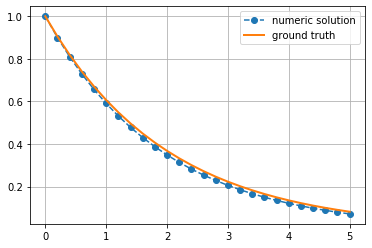

In [3]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

Теперь попробуем задать значение шага $\tau$ (в коде это `dt`) такое, что $|\lambda| \tau > 1$.

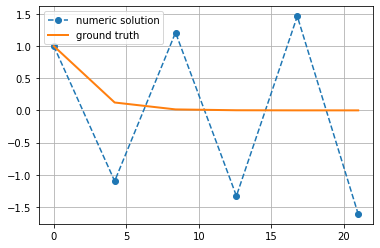

In [4]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=12/abs(lam), dt=2.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### I.II Неявный метод Эйлера.

Напишите функцию решения того же самого уравнения $du/dt = \lambda u$ используя неявную схему Эйлера. Постройте решение для нескольких значений шага интегрирования, обсудите поведение решения при $\lambda\tau > 2$.

In [10]:
def implicit_euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи неявного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps + 1)
    y[0] = u0
    for i in range(num_steps):
        y[i + 1] = y[i] / (1 - lam * dt)
    return tt, y

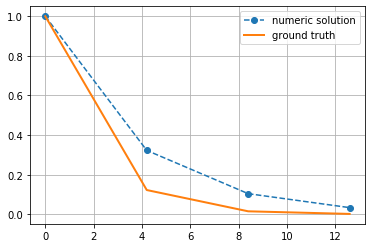

In [11]:
# Plot your solution. Vary the step size, discuss the behavior of the solution for $\lambda\tau > 2$. 

lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

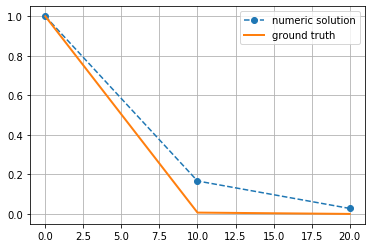

In [14]:
# Add your experiments and discussion here.

lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=10/abs(lam), dt=5./abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

In [12]:
lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))

assert (y > 0).all()


## II. Системы линейных уравнений

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = \mathrm{const}$ - заданная матрица 2$\times$2.

Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [67]:
def euler_solve2(a, u0, T, dt):
    """Solve the system du/dt = Au via an explicit Euler scheme.
    
    Parameters
    ----------
    a : ndarray, shape(ndim, ndim)
        The matrix of the l.h.s.
    u0 : ndarray, shape(ndim,)
        Initial condition
    T : float
        construct the solution for $t\in [0, T)$
    dt : float
        Integration step size $\tau$
        
    Returns
    -------
    t : ndarray, shape (n,)
        Integration times
    y : ndarray, shape (n, ndim)
        Solution of the FD system. 
        y[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.empty((num_steps + 1, ndim))
    y[0] = u0
    for k in range(num_steps):
        y[k + 1, 0] = dt*(a[0, 0]*y[k, 0] + a[0, 1]*y[k, 1]) + y[k, 0]
        y[k + 1, 1] = dt*(a[1, 0] * y[k, 0] + a[1, 1]*y[k, 1]) + y[k, 1]
    return tt, y

Напишите функцию, возвращающую решение задачи Коши для системы уравнений $du/dt = A u$ с постоянной матрицей $A$ через матричную экспоненту. (Используйте библиотечную функцию `scipy.linalg.expm`)

In [68]:
from scipy.linalg import expm

def mat_exp_solve(a, u0, tt):
    """Construct the solution of $du/dt = A u$ with $u(t=0) = u_0$ at times `tt`.
    
    Parameters
    ----------
    a : ndarray, shape (ndim, ndim)
    
    u0 : ndarray, shape (ndim,)
    
    tt : ndarray, shape (n,)
        The values of $t$
        
    Return
    ------
    u : ndarray, shape (n, ndim)
        u[:, k] is $\exp(t[k] A)$
    """
    n = tt.shape[0]
    ndim = a.shape[0]
    u = np.empty((n, ndim))
    for k, t in enumerate(tt):
        u[k, :] = expm(t * a) @ u0
    return u

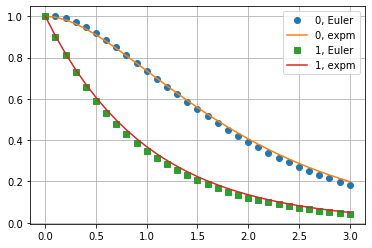

In [69]:
# Solve via Euler's method, compare to the matrix exponential

from scipy.linalg import expm

a = np.array([[-1, 1],
              [0, -1]], dtype=float)
t, y  = euler_solve2(a, u0=[1, 1], T=3, dt=0.1)
ym = mat_exp_solve(a, [1, 1], t)

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)

In [70]:
# This cell is a test to compare your Euler method solution to the matrix exponential

a = np.array([[-1, 1],
              [0, -1]], dtype=float)


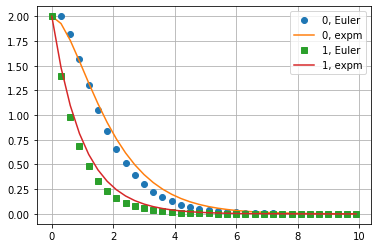

In [71]:
t, y  = euler_solve2(a, u0=[2, 2], T=10, dt=0.3)
ym = mat_exp_solve(a, [2, 2], t)

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)

## II.2 Жесткие системы

Рассмотрим линейную систему, $du/dt = Au$, с матрицей правой части 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $u = (1, 0)^T$.

Найдите собственные значения матрицы $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

(2 балла)

In [72]:
a = np.array([[-10, 10], [32, -499]])
eigvals = np.linalg.eigvals(a)
eigvals_abs = np.absolute(eigvals)
eigvals_abs.max()/eigvals_abs.min()

53.45902427704808

Постройте графики решения системы на интервале $0 < t < 1$ с начальным условием $u = (1, 0)^T$ используя функции `euler_solve2` и `mat_exp_solve`. Используйте несколько значений шага, например $\tau = 4\cdot 10^{-3}$ и $\tau = 4.5\cdot 10^{-3}$. Прокомментируйте поведение решений.

(3 балла)
 

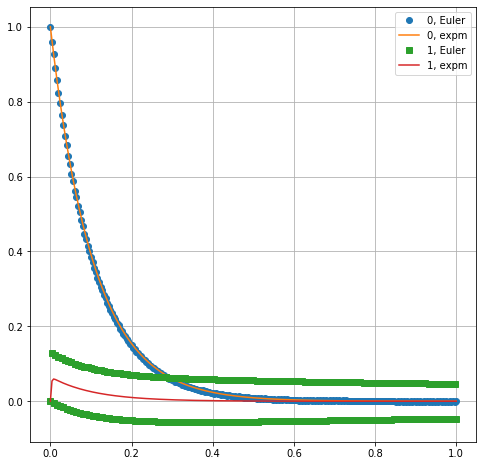

In [73]:
t, y  = euler_solve2(a, u0=[1, 0], T=1, dt=4e-3)
ym = mat_exp_solve(a, [1, 0], t)
plt.figure(figsize=(8, 8))
plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)

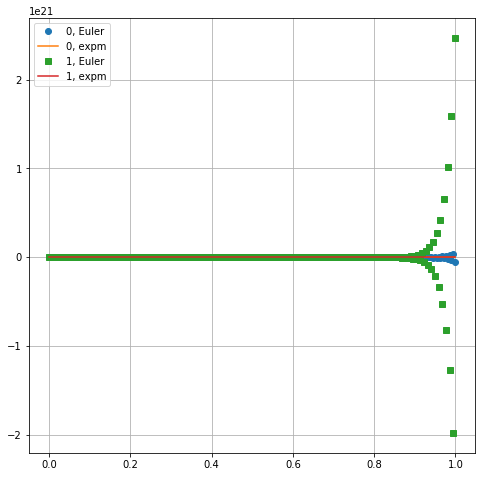

In [74]:
t, y  = euler_solve2(a, u0=[0, 1], T=1, dt=4.5e-3)
ym = mat_exp_solve(a, [0, 1], t)
plt.figure(figsize=(8, 8))

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)

## Неявный метод Эйлера II.3

Реализуйте $\textit{неявную}$ схему Эйлера для системы линейных уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линйных алгебраических уравнений (используйте `np.linalg.solve`).

Примените Вашу реализацию для уравнения из пункта II.2. Прокомментируйте результаты.
(5 баллов)

In [77]:
from numpy.linalg import solve

def implicit_euler_solve2(a, u0, T, dt):
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.empty((num_steps + 1, ndim))
    y[0] = u0
    a_ = np.array([[1 - dt*a[0, 0], -dt*a[0, 1]], [-dt*a[1,0], 1 - dt*a[1,1]]])
    for k in range(num_steps):
        y[k + 1, :] = solve(a_, y[k, :])
    return tt, y

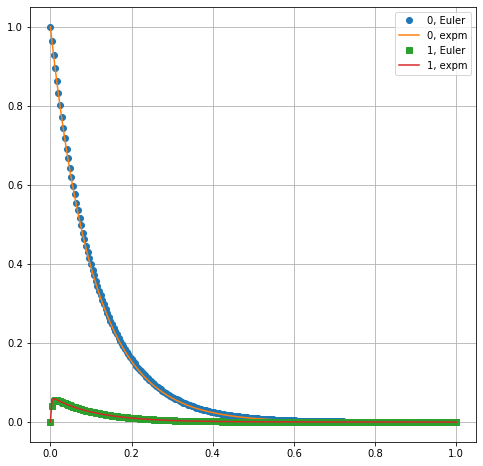

In [78]:
t, y  = implicit_euler_solve2(a, u0=[1, 0], T=1, dt=4e-3)
ym = mat_exp_solve(a, [1, 0], t)
plt.figure(figsize=(8, 8))
plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)

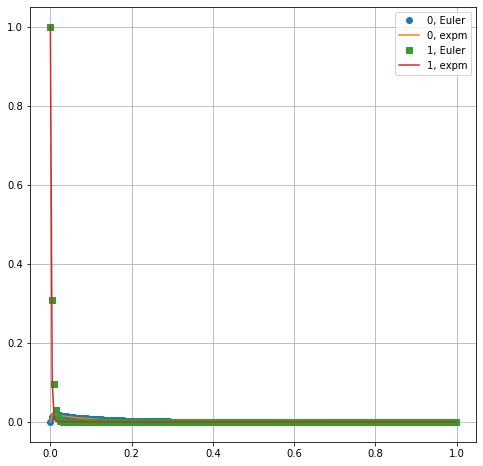

In [79]:
t, y  = implicit_euler_solve2(a, u0=[0, 1], T=1, dt=4.5e-3)
ym = mat_exp_solve(a, [0, 1], t)
plt.figure(figsize=(8, 8))

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)

# III. ОДУ второго порядка.

Рассмотрим ОДУ второго порядка, описывающее осцилляции маятника

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Преобразуйте данное уравнение второго порядка в систему ОДУ первого порядка.

### Тест III.1 

Решите данную систему уравнений, используя явную  схему Эйлера на интервале временине менее десяти периодов осцилляций. 

Мы знаем, что в отсутствии трения выполняется закон сохранения энергии:

$$
E = \frac{(du/dt)^2}{2} + \frac{\omega^2 u^2}{2}
$$

Постройте зависимость $E$ от времени для вашего численного решения. Используйте несколько значений шага. Выполняется ли закон сохранения энергии?

(5 баллов)

In [80]:
def first(omega, u0, T, dt):
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = 2
    y = np.empty((num_steps + 1, ndim))
    y[0] = u0
    for k in range(num_steps):
        y[k + 1, 0] = dt * y[k, 1] + y[k, 0]
        y[k + 1, 1] = -dt*omega**2 * y[k, 0] + y[k, 1]
    return tt, y

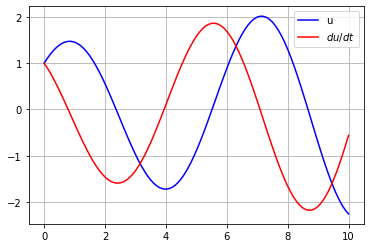

In [117]:
tt, y = first(1, [1, 1], 10, 0.1)
plt.plot(tt, y[:, 0], color='blue', label='u')
plt.plot(tt, y[:, 1], color='red', label='$du/dt$')
plt.legend(loc='best')
plt.grid()

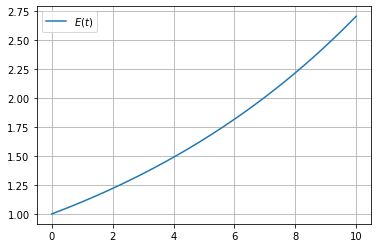

In [118]:
E = [du**2 / 2 + u**2 / 2 for u, du in y]
plt.plot(tt, E, label='$E(t)$')
plt.legend(loc='best')
plt.grid()

### Тест III.2

Реализуйте схему Рунге-Кутта второго порядка. Используте ее для решения того же уравнения с теми же значениями шага $\tau$. Сравните решения, полученные методом Рунге-Кутта и методом Эйлера на одинаковых промежутках времени. Проверьте закон сохранения энергии. Обсудите.

(5 баллов)

In [105]:
def runge_kutta(omega, u0, T, dt):
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = 2
    y = np.empty((num_steps + 1, ndim))
    y[0] = u0
    for k in range(num_steps):
        u_half = y[k, 1] * dt/2 + y[k, 0]
        w_half = -omega**2 * y[k, 0] * dt/2 + y[k, 1]
        y[k + 1, 0] = w_half * dt + y[k, 0]
        y[k + 1, 1] = -omega**2 * u_half * dt + y[k, 1]
    return tt, y

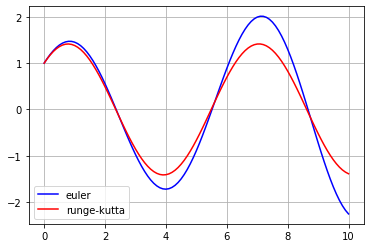

In [115]:
tt, y = first(1, [1, 1], 10, 0.1)
tt_r, y_r = runge_kutta(1, [1, 1], 10, 0.1)

plt.plot(tt, y[:, 0], color='blue', label='euler')
# plt.plot(tt, y[:, 1], color='yellow', label='euler, du/dt')
plt.plot(tt_r, y_r[:, 0], color='red', label='runge-kutta')
# plt.plot(tt_r, y_r[:, 1], color='green', label='runge-kutta, du/dt')
plt.legend(loc='best')
plt.grid()

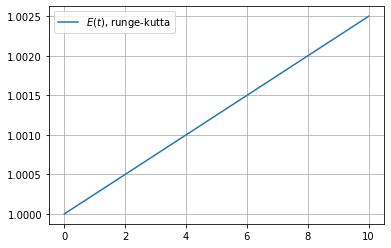

In [119]:
E = [du**2 / 2 + u**2 / 2 for u, du in y_r]
plt.plot(tt, E, label='$E(t)$, runge-kutta')
plt.legend(loc='best')
plt.grid()

### Тест III.3

Используте для решения того же уравнения библиотечную функцию `scipy.intergrate_solve_ivp`.
Сравните результаты с решениями, полученными методомами Рунге-Кутта и Эйлера. Проверьте закон сохранения энергии. Обсудите.

(5 баллов)

In [140]:
from scipy.integrate import solve_ivp
def func(t, u):
    return u[1], -1*u[0]

result = solve_ivp(func, t_span=[0, 10], t_eval=tt, y0=[1, 1])

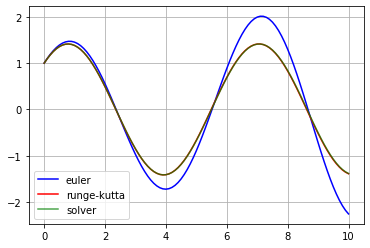

In [148]:
tt, y = first(1, [1, 1], 10, 0.1)
tt_r, y_r = runge_kutta(1, [1, 1], 10, 0.1)
t_t, y_t = result['t'], result['y']

plt.plot(tt, y[:, 0], color='blue', label='euler')
# plt.plot(tt, y[:, 1], color='yellow', label='euler, du/dt')
plt.plot(tt_r, y_r[:, 0], color='red', label='runge-kutta', alpha=1)
plt.plot(t_t, y_t[0, :], color='green', label='solver', alpha=0.7)
plt.legend(loc='best')
plt.grid()